---
Install Library
---

In [1]:
#Library
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from pandas.plotting import autocorrelation_plot


In [2]:
#Baca Data#
df_customer = pd.read_csv(r"C:\Users\laksa\Documents\Project Kalbe\Customer.csv")
df_product = pd.read_csv(r"C:\Users\laksa\Documents\Project Kalbe\Product.csv")
df_store = pd.read_csv(r"C:\Users\laksa\Documents\Project Kalbe\Store.csv")
df_transaction = pd.read_csv(r"C:\Users\laksa\Documents\Project Kalbe\Transaction.csv")

In [3]:
#Melihat Baris & Kolom Masing-masing#
df_customer.shape, df_product.shape, df_store.shape, df_transaction.shape

((447, 5), (10, 3), (14, 6), (5020, 8))

---
Data Cleansing
---

In [4]:
df_customer.head()

,CustomerID,Age,Gender,Marital Status,Income
0,1,55,1,Married,5
1,2,60,1,Married,6
2,3,32,1,Married,9
3,4,31,1,Married,4
4,5,58,1,Married,3


In [5]:
df_product.head()

,ProductID,Product Name,Price
0,P1,Choco Bar,8800
1,P2,Ginger Candy,3200
2,P3,Crackers,7500
3,P4,Potato Chip,12000
4,P5,Thai Tea,4200


In [6]:
df_store.head()

,StoreID,StoreName,GroupStore,Type,Latitude,Longitude
0,1,Prima Tendean,Prima,Modern Trade,-62,106816666
1,2,Prima Kelapa Dua,Prima,Modern Trade,-6914864,107608238
2,3,Prima Kota,Prima,Modern Trade,-7797068,110370529
3,4,Gita Ginara,Gita,General Trade,-6966667,110416664
4,5,Bonafid,Gita,General Trade,-7250445,112768845


In [7]:
df_transaction.head()

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID
0,TR11369,328,1/1/2022,P3,7500,4,30000,12
1,TR16356,165,1/1/2022,P9,10000,7,70000,1
2,TR1984,183,1/1/2022,P1,8800,4,35200,4
3,TR35256,160,1/1/2022,P1,8800,7,61600,4
4,TR41231,386,1/1/2022,P9,10000,1,10000,4


In [8]:
#data cleansing df_customer
df_customer['Income'] = df_customer['Income'].replace('[,]','.',regex=True).astype('float')

In [9]:
#data cleansing df store
df_store['Latitude'] = df_store['Latitude'].replace('[,]','.',regex=True).astype('float')
df_store['Longitude'] = df_store['Longitude'].replace('[,]','.',regex=True).astype('float')

Gabung Data
---

In [10]:
df_merge = pd.merge(df_transaction,df_customer, on=['CustomerID'])
df_merge = pd.merge(df_merge, df_product.drop(columns=['Price']), on=['ProductID'])
df_merge = pd.merge(df_merge, df_store, on=['StoreID'])

In [11]:
df_merge.head()

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID,Age,Gender,Marital Status,Income,Product Name,StoreName,GroupStore,Type,Latitude,Longitude
0,TR11369,328,1/1/2022,P3,7500,4,30000,12,36,0,Married,10.0,Crackers,Prestasi Utama,Prestasi,General Trade,-2990934.0,104756554.0
1,TR89318,183,17/07/2022,P3,7500,1,7500,12,27,1,Single,0.0,Crackers,Prestasi Utama,Prestasi,General Trade,-2990934.0,104756554.0
2,TR9106,123,26/09/2022,P3,7500,4,30000,12,34,0,Married,4.0,Crackers,Prestasi Utama,Prestasi,General Trade,-2990934.0,104756554.0
3,TR4331,335,8/1/2022,P3,7500,3,22500,12,29,1,Single,4.0,Crackers,Prestasi Utama,Prestasi,General Trade,-2990934.0,104756554.0
4,TR6445,181,10/1/2022,P3,7500,4,30000,12,33,1,Married,9.0,Crackers,Prestasi Utama,Prestasi,General Trade,-2990934.0,104756554.0


In [12]:
df_merge.to_excel('kalbe.xlsx')

Model machine learning regresi
---

In [13]:
df_regresi = df_merge.groupby(['Date']).agg({
    'Qty' : 'sum'
}).reset_index()

In [17]:
df_regresi

,Date,Qty
0,1/1/2022,49
1,1/10/2022,85
2,1/11/2022,66
3,1/12/2022,81
4,1/2/2022,50
...,...,...
360,9/5/2022,75
361,9/6/2022,55
362,9/7/2022,44
363,9/8/2022,73


In [18]:
decomposed = seasonal_decompose(df_regresi.set_index('Date'))

plt.figure(figsize=(8,8))

plt.subplot(311)
decomposed.trend.plot(ax=plt.gca())
plt.title('Trend')
plt.subplot(312)
decomposed.seasonal.plot(ax=plt.gca())
plt.title('Seasonality')
plt.subplot(313)
decomposed.resid.plot(ax=plt.gca())
plt.title('Residuals')

plt.tight_layout()

ValueError: You must specify a period or x must be a pandas object with a PeriodIndex or a DatetimeIndex with a freq not set to None

In [19]:
cut_off = round(df_regresi.shape[0] * 0.9)
df_train = df_regresi[:cut_off]
df_test = df_regresi[cut_off:].reset_index(drop=True)
df_train.shape, df_test.shape

((328, 2), (37, 2))

In [20]:
df_train

,Date,Qty
0,1/1/2022,49
1,1/10/2022,85
2,1/11/2022,66
3,1/12/2022,81
4,1/2/2022,50
...,...,...
323,6/4/2022,45
324,6/5/2022,50
325,6/6/2022,46
326,6/7/2022,48


In [21]:
df_test

,Date,Qty
0,6/9/2022,18
1,7/1/2022,37
2,7/10/2022,56
3,7/11/2022,39
4,7/12/2022,35
5,7/2/2022,32
6,7/3/2022,79
7,7/4/2022,48
8,7/5/2022,72
9,7/6/2022,63


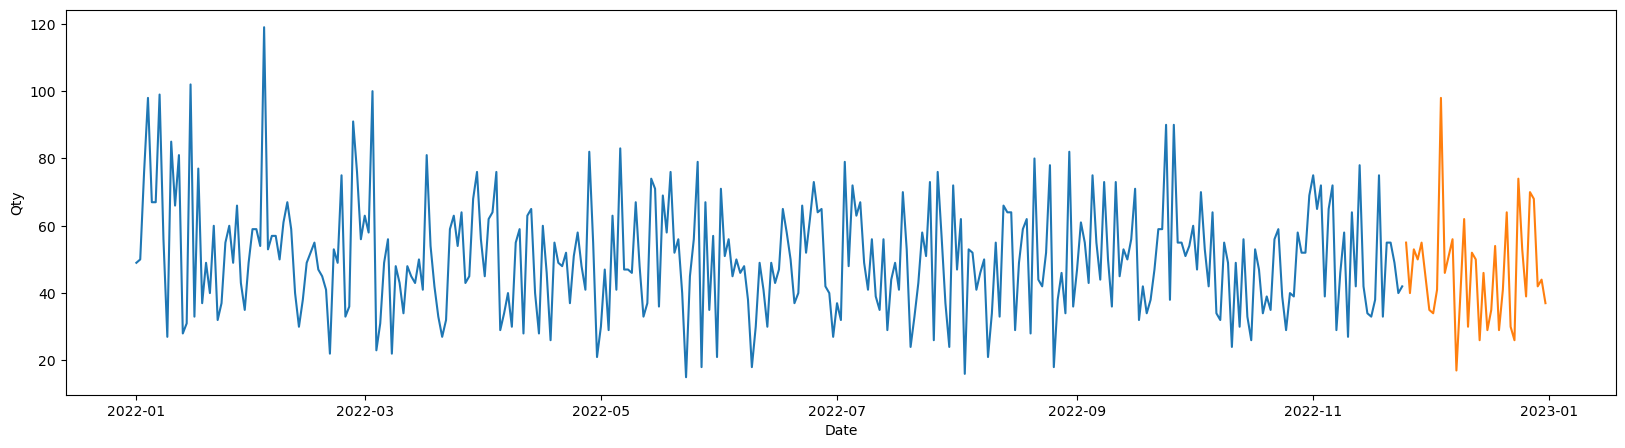

In [97]:
plt.figure(figsize=(20,5))
sns.lineplot(data=df_train, x=df_train['Date'], y=df_train['Qty']);
sns.lineplot(data=df_test, x=df_test['Date'], y=df_test['Qty']);

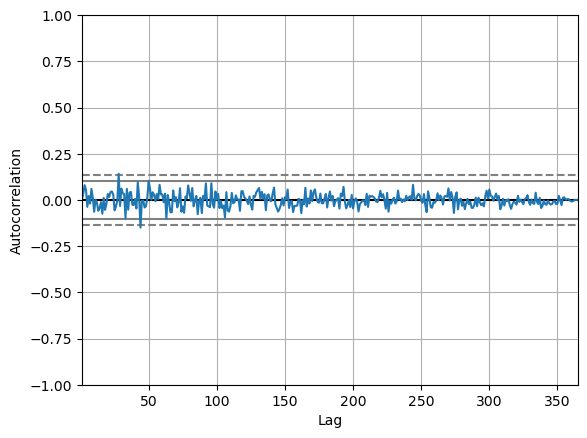

In [98]:
autocorrelation_plot(df_regresi['Qty']);

In [59]:
def rmse(y_actual, y_pred):
    """
    function to calculate RMSE
    """
    
    print(f'RMSE value {mean_squared_error(y_actual, y_pred)**0.5}')
    
def eval(y_actual, y_pred):
    """
    functional to eval machine learning modelling
    """
    
    rmse(y_actual, y_pred)
    print(f'MAE value {mean_absolute_error(y_actual, y_pred)}')

C:\Users\laksa\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:557: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  _index = to_datetime(index)
C:\Users\laksa\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\laksa\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\laksa\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:557: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently pars

Mean Squared Error: 227.25546888272018
Mean Absolute Error: 11.430588432541914


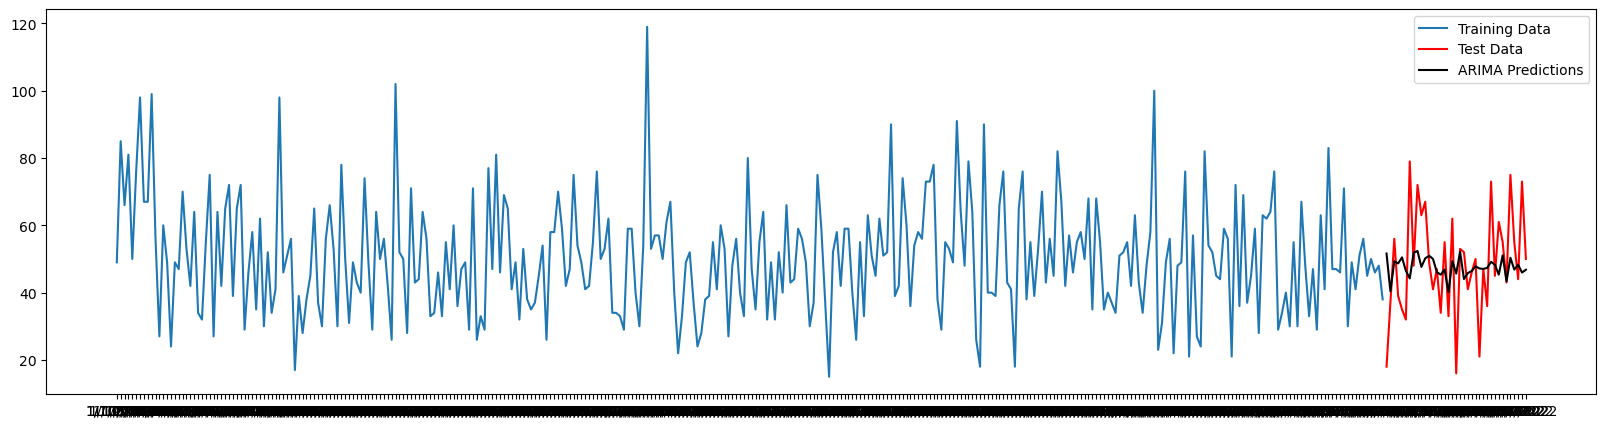

In [23]:
#Arima#
df_train = df_train.set_index('Date')
df_test = df_test.set_index('Date')

y = df_train['Qty']

ARIMAModel = ARIMA(y, order=(40, 2, 1))
ARIMAModel = ARIMAModel.fit()

y_pred = ARIMAModel.get_forecast(len(df_test))

y_pred_df = y_pred.conf_int()
y_pred_df['predictions'] = ARIMAModel.predict(start=y_pred_df.index[0], end=y_pred_df.index[-1])
y_pred_df.index = df_test.index
y_pred_out = y_pred_df['predictions']

# Evaluasi performa model
mse = mean_squared_error(df_test['Qty'], y_pred_out)
mae = mean_absolute_error(df_test['Qty'], y_pred_out)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

plt.figure(figsize=(20, 5))
plt.plot(df_train['Qty'], label='Training Data')
plt.plot(df_test['Qty'], color='red', label='Test Data')
plt.plot(y_pred_out, color='black', label='ARIMA Predictions')
plt.legend()
plt.show()

In [27]:
# Menghitung total prediksi qty harian dari produk yang terjual
total_pred_qty = y_pred_out.sum()

print("Total prediksi qty harian produk yang terjual:", total_pred_qty)

Total prediksi qty harian produk yang terjual: 1761.1758254050474


---
Clustering
---

In [102]:
df_merge.head()

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID,Age,Gender,Marital Status,Income,Product Name,StoreName,GroupStore,Type,Latitude,Longitude
0,TR11369,328,2022-01-01,P3,7500,4,30000,12,36,0,Married,10.0,Crackers,Prestasi Utama,Prestasi,General Trade,-2990934.0,104756554.0
1,TR89318,183,2022-07-17,P3,7500,1,7500,12,27,1,Single,0.0,Crackers,Prestasi Utama,Prestasi,General Trade,-2990934.0,104756554.0
2,TR9106,123,2022-09-26,P3,7500,4,30000,12,34,0,Married,4.0,Crackers,Prestasi Utama,Prestasi,General Trade,-2990934.0,104756554.0
3,TR4331,335,2022-08-01,P3,7500,3,22500,12,29,1,Single,4.0,Crackers,Prestasi Utama,Prestasi,General Trade,-2990934.0,104756554.0
4,TR6445,181,2022-10-01,P3,7500,4,30000,12,33,1,Married,9.0,Crackers,Prestasi Utama,Prestasi,General Trade,-2990934.0,104756554.0


In [105]:
df_cluster = df_merge.groupby(['CustomerID']).agg({
    'TransactionID' : 'count',
    'Qty' : 'sum',
    'TotalAmount' : 'sum'
}).reset_index()

In [106]:
df_cluster.head()

,CustomerID,TransactionID,Qty,TotalAmount
0,1,17,60,623300
1,2,13,57,392300
2,3,15,56,446200
3,4,10,46,302500
4,5,7,27,268600


In [107]:
df_cluster

,CustomerID,TransactionID,Qty,TotalAmount
0,1,17,60,623300
1,2,13,57,392300
2,3,15,56,446200
3,4,10,46,302500
4,5,7,27,268600
...,...,...,...,...
442,443,16,59,485100
443,444,18,62,577700
444,445,18,68,587200
445,446,11,42,423300


In [108]:
data_cluster = df_cluster.drop(columns=['CustomerID'])
data_cluster_normalize = preprocessing.normalize(data_cluster)

In [109]:
data_cluster_normalize

array([[2.72741856e-05, 9.62618317e-05, 9.99999995e-01],
       [3.31379043e-05, 1.45296965e-04, 9.99999989e-01],
       [3.36172117e-05, 1.25504257e-04, 9.99999992e-01],
       ...,
       [3.06539507e-05, 1.15803814e-04, 9.99999993e-01],
       [2.59862980e-05, 9.92204105e-05, 9.99999995e-01],
       [2.95925334e-05, 9.56066465e-05, 9.99999995e-01]])

In [115]:
K = range(2,8)
fits =[]
score = []

for k in K:
    model = KMeans(n_clusters = k, random_state = 0, n_init='auto').fit(data_cluster_normalize)
    fits.append(model)
    score.append(silhouette_score(data_cluster_normalize, model.labels_, metric='euclidean'))

C:\Users\laksa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\laksa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\laksa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\laksa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

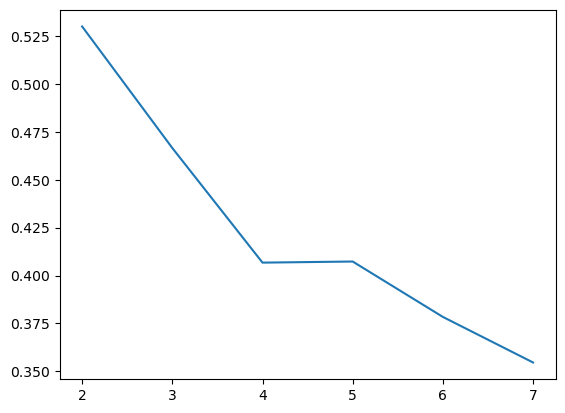

In [116]:
#choose 4 cluster
sns.lineplot(x = K, y = score);

In [118]:
df_cluster['cluster_label'] = fits[2].labels_

In [120]:
df_cluster.groupby(['cluster_label']).agg({
    'CustomerID' : 'count',
    'TransactionID' : 'mean',
    'Qty' : 'mean',
    'TotalAmount' : 'mean'
})

,CustomerID,TransactionID,Qty,TotalAmount
cluster_label,,,,
0,128,11.601562,40.007812,418542.187500
1,28,9.250000,35.142857,225110.714286
2,156,11.628205,42.775641,383731.410256
3,135,10.829630,40.874074,313365.925926
